In [44]:
from IPython.core.display import HTML, Markdown, display

import numpy.random as npr
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.formula.api as smf
import ipywidgets as widgets

import os

# Lab 1: Advanced Regression

Authored by *Todd Gureckis*  
Aspects borrowed from [General Assembly's Data Science](https://github.com/justmarkham/DAT4) course which claims to have *adapted materials from Chapter 3 of [An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/)*

Congratulations, you made it through the first part of the lab, and now understand the basic of simple linear regression!  Before we move onto the actual analyses in this lab we need to cover a little further background on what we will call "advanced" topics in regression.  However, don't be afraid!  This is not really "advanced" but more like "nuance, details, and stuff you'll need later".  So this isn't an exercise in math or abstraction but additional practical skills it is useful to know about in order to be a savvy psychological data scientist!

<img src="http://www.phdcomics.com/comics/archive/phd081310s.gif" width="500">

(replace years in grad school with "week in lab in cognition and perception")

## Checking assumptions

As mentioned in the reading, there are a variety of commonly asserted "assumptions" that need to be met in order for some of the interpretation of regression fits to be valid.  Mostly this has to do with interpreting things like the $p$-values associated with the regression line itself or with the estimated coefficients.  In the realm of just using a fitted model to make predictions, you're in a bit better shape because you will generally do poorly at prediction if your model is wrong for the data, but that's just built into the concept of prediction.  It is the interpretation of coefficients which always sounds kind of reasonable but can be completely wrong headed if the assumptions are not met.

One of the more important assumption of linear regression is that the relationship between the predictor and outcome variable is roughly **linear**.  Seems obvious right?  But remember the exxamples mentioned in Chapter 4 called the anscomb quartet which were examples which have exactly the same correlation value ($r$) but are clearly showing quite different things?

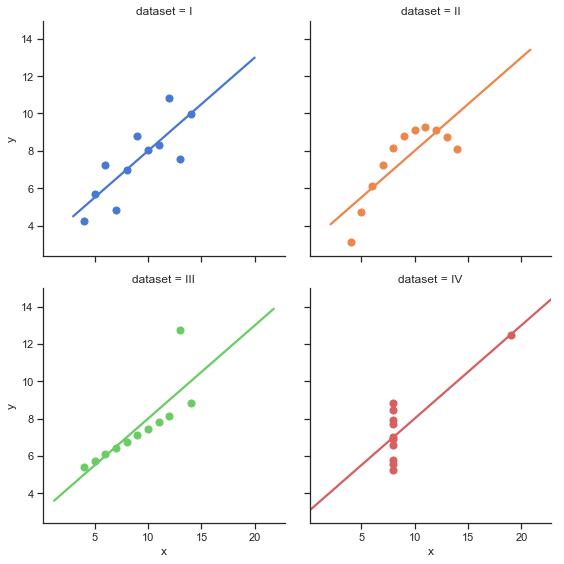

In [6]:
import seaborn as sns
sns.set(style="ticks")

# Load the example dataset for Anscombe's quartet
df = sns.load_dataset("anscombe")

# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1})

In each of these examples, you can see a nice line fit to each one but the underlying data is quite different.  This illustrates a nice exmaple of data that might "violate" the assumptions of a regression in some way.

<div class="alert alert-info" role="alert">
  <strong>Question 1</strong> <br>
    The cell below shows how to extract the data for each of these examples from the larger data frame.  Using your statsmodels skills conduct a linear regression between x and y for each of these dataset and verify that they have the same overall R~2 value.
</div>

In [ ]:
# as a reminder to select only data for dataset I we sub-select from the original data frame:
df[df.dataset=='I']

<div class="alert alert-warning" role="alert">
  <strong>Your Answer</strong> <br>
  Delete this text and put your answer here.  The code for your analysis should appear in the cells below.
</div>

<div class="alert alert-info" role="alert">
  <strong>Question 2</strong> <br>
    Dataset II, III, and IV have odd patterns which appear to violate one or more of the assumptions of the linear regression.  Referring back to the chapter on regression, provide python code to demonstrate at least one of these violations. As a reminder, the assumption appear in the section "Assumptions of regression" and include normality, linearity, homogeneity or variance, uncorrelated predictors, residuals are independent of each other, and no "bad" outlier. You will find it helpful to peek at the code provided in the textbook along with the various plots.
</div>

<div class="alert alert-warning" role="alert">
  <strong>Your Answer</strong> <br>
  Delete this text and put your answer here.  The code for your analysis should appear in the cells below.
</div>

## Multiple regression

All of the examples we considered in the last notebook use a regression equation that looked something like this:

$$y = \beta_0 + \beta_1x$$

which is often known as simple linear regression.  What makes it simple is that there is a single predictor ($x$) and it enter into the linear equation in a very standard way.

<img src="https://pvsmt99345.i.lithium.com/t5/image/serverpage/image-id/9784i6F28C15930EDC179/image-dimensions/1700?v=1.0&px=-1" width="350">

As described in the text, simple linear regression can easily be extended to include multiple features. This is called **multiple linear regression**:

$y = \beta_0 + \beta_1x_1 + ... + \beta_nx_n$

Each $x$ represents a different feature, and each feature has its own coefficient. For example, for the advertising data we considered in the previous lab:

$y = \beta_0 + \beta_1 \times TV + \beta_2 \times Radio + \beta_3 \times Newspaper$

Let's use Statsmodels to estimate these coefficients:

In [34]:
ad_data = pd.read_csv('http://gureckislab.org/courses/fall19/labincp/data/advertising.csv')

In [35]:
# create a fitted model with all three features
lm = smf.ols(formula='sales ~ tv + radio + newspaper', data=ad_data).fit()

# print the coefficients
lm.params

Intercept    2.938889
tv           0.045765
radio        0.188530
newspaper   -0.001037
dtype: float64

In [36]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 21 Oct 2019   Prob (F-statistic):           1.58e-96
Time:                        00:43:27   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
tv             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

What are a few key things we learn from this output?

- TV and Radio have significant **p-values**, whereas Newspaper does not. Thus we reject the null hypothesis for TV and Radio (that there is no association between those features and Sales), and fail to reject the null hypothesis for Newspaper.
- TV and Radio ad spending are both **positively associated** with Sales, whereas Newspaper ad spending is **slightly negatively associated** with Sales. (However, this is irrelevant since we have failed to reject the null hypothesis for Newspaper.)
- This model has a higher **R-squared** (0.897) than the simpler models we considered in the last lab section, which means that this model provides a better fit to the data than a model that only includes TV.  However, remember that this is a case where comparing **adjusted R-squared** values might be more appropriate.  This is because our more complex model (with more predictors) is more flexible too. The adjusted R-squared helps with this but trying to compare the quality of the fit, controlling for the number of predictors.

<div class="alert alert-info" role="alert">
  <strong>Question 3</strong> <br>
    Return to the parenthood data set we considered in the last lab (<b>http://gureckislab.org/courses/fall19/labincp/data/parenthood.csv</b>).  Re-read this data in (you have a new notebook and kernel now) and conduct a multiple regression that predict grumpiness using by dad sleep and baby sleep.  Following the text in the chapter and the example above interpret the coefficients and p-value for this model.
</div>

<div class="alert alert-warning" role="alert">
  <strong>Your Answer</strong> <br>
  Delete this text and put your answer here.  The code for your analysis should appear in the cells below.
</div>

## Colinearity

Colinearity is a situation that arises only in multiple regression.  Here it means that some of the information contained in the various predictors you enter into your multiple regression model can be reconstructes as a linear combination of some of the other predictors.

Remember that the coefficients in multiple regression measure the effect of a unit increase of predictor X with all other predictors held constant.  However, it is impossible to measure this effect if one of the other predictors is highly correlated or perhaps even identical to X.  The effect that this has on regression estimates is that the coefficients have more uncertainty about them (i.e., the 95% confidence intervals are wider).

<img src="https://pvsmt99345.i.lithium.com/t5/image/serverpage/image-id/9785i42EAC94692C75AD3/image-dimensions/1700?v=1.0&px=-1" width="400">

The following four dataset (provided in a nice blog post about colinearity by [Jan Vanhove](https://janhove.github.io/analysis/2019/09/11/collinearity)) give examples of a strong, weak, non, or nonlinear pattern of colinearity between to predictors.  In each case we are interested in the multiple linear regression between the two predictors and the outcome.

$$outcome=\beta_1×predictor1+\beta_2×predictor2+\beta_0$$

Strong - "https://janhove.github.io/datasets/strong_collinearity.csv"  
Weak - "https://janhove.github.io/datasets/weak_collinearity.csv"  
None - "https://janhove.github.io/datasets/no_collinearity.csv"  
Nonlinear - "https://janhove.github.io/datasets/nonlinearity.csv"

<div class="alert alert-info" role="alert">
  <strong>Question 4</strong> <br>
    This exercise asks you to use the internet to solve a problem which we haven't explicitly taught you how to solve yet.  Thus it is ok to have trouble but also you learn a lot by solving things yourself.  Read about the function `PairGrid()` on the seaborn website.  The PairGrid() is one method of showing the relationship between different variabels in a dataframe.  Plot a pairgrid for each of the four datasets above.  What do you notice about the relationship between the predictors.  Which ones are likely to have a problem with colinearity when the outcome variable is predicted using the predictors and why?
</div>

<div class="alert alert-warning" role="alert">
  <strong>Your Answer</strong> <br>
  Delete this text and put your answer here.  The code for your analysis should appear in the cells below.
</div>

<div class="alert alert-info" role="alert">
  <strong>Question 5</strong> <br>
    Fit a regression to each of the example and extract both the parameters/coefficients and the 95% confidence intervals.  Report them in a single table (you might find it helpful to create a new pandas dataframe to do this) comparing the estimates values and 95% confidence intervals.  What is different across the datasets?
</div>

<div class="alert alert-warning" role="alert">
  <strong>Your Answer</strong> <br>
  Delete this text and put your answer here.  The code for your analysis should appear in the cells below.
</div>

## Datamunging!  Getting the data together for next time!

First, read about [data wrangling](https://en.wikipedia.org/wiki/Data_wrangling) on wikipedia.

We ran a mental rotation experiment on ourselves last time in class.  The data for this experiment is located in the data/ folder for this lab.  We can use the `os` library (stands for operating system) to access files our or local jupyterhub instance.

<div class="alert alert-info" role="alert">
  <strong>Question 7</strong> <br>
    The following command will list all the files we collected in class.  Using a for loop (gasp!) read each of the files from the list below into a pandas dataframe.  Then, using the pandas `concat` function (Refer back to the dataframes lab) combine them into a single data frame. 
</div>

In [47]:
  [f for f in os.listdir('lab1-data') if not f.startswith('.')]

['todd_MentalRotationFinal_2019-10-16_09h19.14.626.csv',
 'db12_MentalRotationFinal_2019-10-16_10h07.25.323.csv',
 'MC24_MentalRotationFinal_2019-10-16_10h07.00.765.csv',
 'iw44_MentalRotationFinal_2019-10-16_10h13.25.202.csv',
 'SK36_MentalRotationFinal_2019-10-16_10h06.46.723.csv',
 'nd24_MentalRotationFinal_2019-10-16_10h07.00.120.csv',
 'si13_MentalRotationFinal_2019-10-16_10h08.40.421.csv',
 'so30_MentalRotationFinal_2019-10-16_10h07.15.941.csv',
 'AB29_MentalRotationFinal_2019-10-16_10h06.57.151.csv',
 'bk90_MentalRotationFinal_2019-10-16_10h06.50.402.csv',
 'Monishee_Matin_MentalRotationFinal_2019-10-16_10h15.03.136.csv',
 'j98_MentalRotationFinal_2019-10-16_10h06.41.102.csv',
 'kc10_MentalRotationFinal_2019-10-16_10h07.21.070.csv',
 'ml98_MentalRotationFinal_2019-10-16_10h06.48.933.csv',
 'vt15_MentalRotationFinal_2019-10-16_10h06.53.044.csv',
 'Cc01_MentalRotationFinal_2019-10-16_10h07.35.155.csv',
 'de24_MentalRotationFinal_2019-10-16_10h06.42.945.csv',
 'ek87_MentalRotationF

<div class="alert alert-warning" role="alert">
  <strong>Your Answer</strong> <br>
  Delete this text and put your answer here.  The code for your analysis should appear in the cells below.
</div>

<div class="alert alert-info" role="alert">
  <strong>Question 8</strong> <br>
    Take a look at the structure of the combined dataframe and try to write down a guide to all the columns using a markdown cell.  This can be your notes for future when you want to look up what a column means.  It is ok if you don't know what everything is as long as you get the main columns correct.  Next we want to check the data for 'sanity'.  This means things like how many trials did each subject perform?  Did any subjects perform considerable fewer or more trials (this might be a reason to exclude one of the people from the analysis).
</div>

<div class="alert alert-warning" role="alert">
  <strong>Your Answer</strong> <br>
  Delete this text and put your answer here.  The code for your analysis should appear in the cells below.
</div>

<div class="alert alert-info" role="alert">
  <strong>Question 9</strong> <br>
    USing a for loop, for each subject in the data frame plot a histogram of their reaction time distributions using seaborn's distplot() command.  Is there any subjects that look odd or different from the rest on this measure?
</div>

<div class="alert alert-warning" role="alert">
  <strong>Your Answer</strong> <br>
  Delete this text and put your answer here.  The code for your analysis should appear in the cells below.
</div>